In [1]:
#looking at gensim
import gensim, logging
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np
import sys
sys.path.append("../../rnn_disf_detection")
from data.load import switchboardfold
%matplotlib inline

In [2]:
new_model = gensim.models.Word2Vec.load('bnc_swbd_clean_50')

In [3]:
new_model.most_similar("you")

[('they', 0.8792446255683899),
 ('we', 0.866344690322876),
 ('id', 0.8224425911903381),
 ('i', 0.7980479001998901),
 ('youd', 0.7952147126197815),
 ('youll', 0.7681373357772827),
 ('theyd', 0.765680193901062),
 ('yourself', 0.7569528818130493),
 ('hed', 0.7327579855918884),
 ('youre', 0.7294138669967651)]

In [4]:
new_model.most_similar("sad")

[('funny', 0.8485233783721924),
 ('frankly', 0.8141113519668579),
 ('clever', 0.8109443187713623),
 ('horrible', 0.7995637655258179),
 ('hopeful', 0.789257824420929),
 ('silly', 0.7811764478683472),
 ('ridiculous', 0.780436635017395),
 ('awfully', 0.7759549021720886),
 ('miserable', 0.7743895053863525),
 ('strange', 0.7716048359870911)]

In [5]:
print new_model.layer1_size

50


In [6]:
def plot_word_spread(model, vocab, special_vocab):
#     global dictionary
    X = np.array([model[word] for word in vocab],dtype="float")
    #print X[0:10]
    #return
    #tsne_model = manifold.t_sne.TSNE()
    tsne_model = TSNE(random_state=0)
    X_2d = tsne_model.fit_transform(X)
    plt.figure(figsize=(15,10))
    plt.scatter(X_2d[:,0], X_2d[:,1])
    for no, word in zip(range(0,len(vocab)),vocab):
        if word in special_vocab:
            colour="red"
        else: 
            colour = "blue"
        plt.text(X_2d[no,0] + np.random.normal(0, 1), 
                 X_2d[no,1] + np.random.normal(0, 1), word, color=colour)    
    plt.show()
    plt.savefig('embeddings2.png',format="png")

In [7]:
#get dict and data from SWBD
train_set, valid_set, test_set, valid_set_alltags, test_set_alltags, dic, train_dict = switchboardfold()
print str(len(dic['words2idx'].items())) + " words in vocab"

loading training data
loaded 90509 sequences
loading training data
loaded 5717 sequences
loading training data
loaded 5942 sequences
loading training data
loaded 5717 sequences
loading training data
loaded 5942 sequences
9070 words in vocab


In [8]:
#get embeddings from path
emb_path1 = "/Users/julianhough/Bender/disf-elman-forward-10/epoch_13/embeddings.npy"
emb = np.load(emb_path1)

In [9]:
#build a simple dict, like the model which is vocab -> embedding vector slice
fillers = ['uh', 'um', 'oh']
lim = 300; count = 0

full_vocab = dict()
my_vocab = []
for key, val in sorted(dic['words2idx'].items(), key=lambda x: x[1]):
    my_vocab.append(key)
    full_vocab[key] = emb[val]
    count+=1
    if count>lim: break

In [10]:
for f in fillers:
    full_vocab[f] = emb[dic['words2idx'][f]]
my_vocab.extend(fillers)

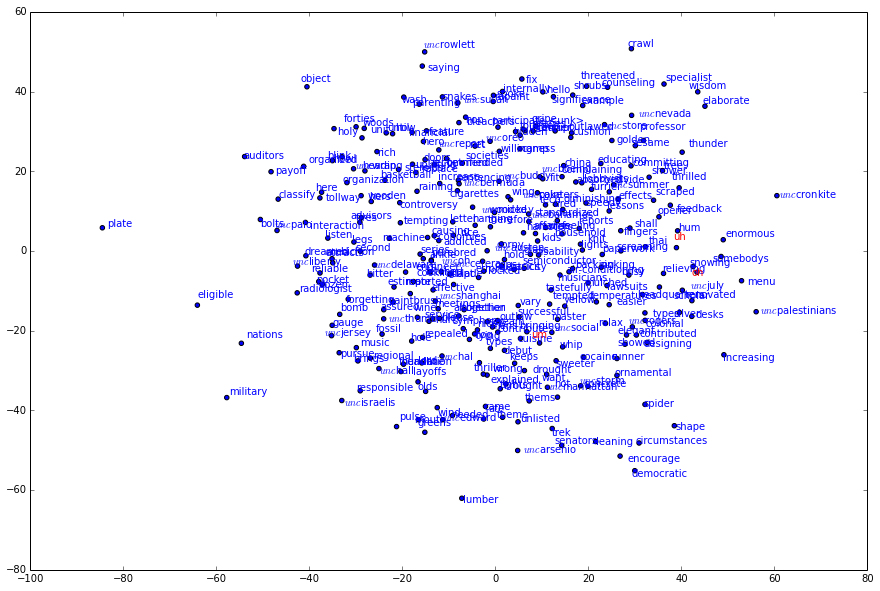

In [11]:
plot_word_spread(full_vocab, my_vocab, fillers)